In [1]:
from tracker import *
from notebook import *
%matplotlib inline


In [2]:
tracker = Tracker('/tmp/a.pkl')
for i in range(3):
    for j in range(5):
        tracker.log({
            'step': {
                'id': j,
                'loss': np.random.rand(),
            }
        }, commit=False)
        tracker.log({
            'step.acc': np.random.rand(),
            'type': 1,
        })
    tracker.log({
        'epoch': {
            'id': i,
            'loss': np.random.rand(),
            'acc': np.random.rand(),
        },
        'type': 2,
    })

tracker.close()


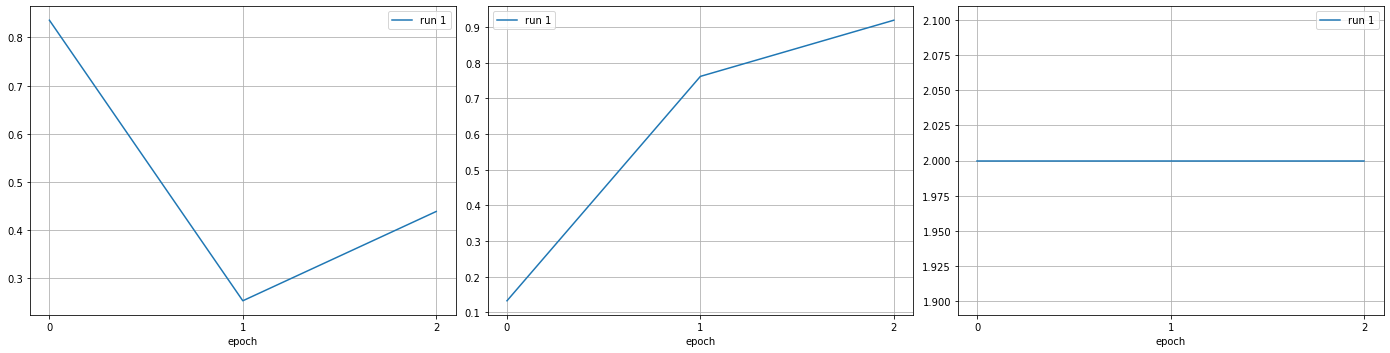

In [3]:
from matplotlib.ticker import MaxNLocator

run = TrackerRun('/tmp/a.pkl')
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(6.4 * 3, 4.8 * 1), constrained_layout=True)

run.plot(x='epoch.id', y=['epoch.loss', 'epoch.acc', 'type'], subplots=True, ax=axes, label='run 1', color='C0', grid=True, xlabel='epoch')

for ax in axes:
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.tight_layout()
